# **Introduction**  

The dataset contains **transactional retail data** that captures customer purchasing behavior, sales trends, and product performance. It includes details such as **transaction dates, customer demographics (age, gender, location), product categories, payment methods, shipping types, and customer churn status**.  

### **Key Insights from the Dataset**  
This dataset provides valuable insights into:  
- **Customer purchasing behavior**: Frequency, preferred products, and spending patterns.  
- **Sales trends**: Seasonal variations, top-selling products, and revenue distribution.  
- **Product performance**: Demand for different categories and pricing impact.  
- **Customer churn analysis**: Identifying factors that lead to customer retention or churn.  

### **Objective of Analysis**  
The dataset will be used for **exploratory data analysis (EDA), data preprocessing, and predictive modeling** to enhance marketing strategies and optimize business decisions. 🚀  


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report   
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from statsmodels.tsa.holtwinters import ExponentialSmoothing




# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [27]:
# Load the dataset
data = pd.read_csv(r"data\retail_customer_data__.csv")
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Location,Product Category,Quantity,Price per Unit,Total Amount,Payment Method,Shipping Type,Subscription Status,Promo Code Used,Discount Applied,Previous Purchases,Frequency of Purchases,Churn
0,1,11/5/2023,CUST856,Female,39,Michigan,Sports,1,98.0,98,Venmo,Free Shipping,Yes,Yes,No,32,Bi-Weekly,Yes
1,2,8/19/2024,CUST824,Male,36,Florida,Books,3,222.0,666,Google Pay,Express,Yes,Yes,Yes,34,Quarterly,No
2,3,10/2/2023,CUST105,Female,36,California,Clothing,3,114.0,342,PayPal,Next Day Air,Yes,Yes,No,32,Weekly,Yes
3,4,8/13/2023,CUST428,Male,33,Florida,Electronics,1,16.0,16,Venmo,Standard,No,Yes,Yes,2,Quarterly,No
4,5,9/11/2024,CUST160,Female,20,Florida,Footwear,5,839.0,4195,Cash,Next Day Air,Yes,Yes,Yes,43,Monthly,Yes


In [3]:
# Checking the data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transaction ID          502 non-null    int64  
 1   Date                    502 non-null    object 
 2   Customer ID             502 non-null    object 
 3   Gender                  502 non-null    object 
 4   Age                     502 non-null    int64  
 5   Location                502 non-null    object 
 6   Product Category        500 non-null    object 
 7   Quantity                502 non-null    int64  
 8   Price per Unit          501 non-null    float64
 9   Total Amount            502 non-null    int64  
 10  Payment Method          500 non-null    object 
 11  Shipping Type           502 non-null    object 
 12  Subscription Status     502 non-null    object 
 13  Promo Code Used         501 non-null    object 
 14  Discount Applied        501 non-null    ob

In [4]:
data.shape

(502, 18)

# **Data Preprocessing**

In [5]:
# Checking the statistics of the data
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Previous Purchases
count,502.000000,502.00000,502.000000,501.000000,502.000000,502.000000
mean,251.462151,41.24502,2.892430,516.574850,1499.561753,25.245020
std,144.996158,13.58428,1.407275,291.002386,1206.343914,14.676747
min,1.000000,18.00000,1.000000,10.000000,15.000000,0.000000
25%,126.250000,30.00000,2.000000,241.000000,618.250000,13.000000
50%,251.500000,41.00000,3.000000,540.000000,1106.000000,26.000000
75%,376.750000,53.00000,4.000000,775.000000,2150.250000,38.000000
max,501.000000,65.00000,5.000000,996.000000,4980.000000,50.000000


In [6]:
# Checking the columns with missing data
data.isnull().sum()

Transaction ID            0
Date                      0
Customer ID               0
Gender                    0
Age                       0
Location                  0
Product Category          2
Quantity                  0
Price per Unit            1
Total Amount              0
Payment Method            2
Shipping Type             0
Subscription Status       0
Promo Code Used           1
Discount Applied          1
Previous Purchases        0
Frequency of Purchases    1
Churn                     1
dtype: int64

In [7]:
# Indepth analysis of the missing values
data[data.isnull().any(axis=1)]


,Transaction ID,Date,Customer ID,Gender,Age,Location,Product Category,Quantity,Price per Unit,Total Amount,Payment Method,Shipping Type,Subscription Status,Promo Code Used,Discount Applied,Previous Purchases,Frequency of Purchases,Churn
13,14,1/22/2025,CUST546,Male,21,Texas,NaN,1,441.0,441,Debit Card,Standard,No,No,No,4,Weekly,No
48,49,9/17/2023,CUST922,Female,60,Michigan,Electronics,3,NaN,1455,Cash,Standard,No,NaN,Yes,48,Weekly,Yes
58,59,1/18/2025,CUST629,Female,22,California,Footwear,2,951.0,1902,NaN,Standard,No,No,NaN,9,NaN,Yes
59,60,8/19/2023,CUST127,Male,31,Ohio,NaN,4,107.0,428,Cash,Next Day Air,Yes,No,No,18,Quarterly,No
82,83,6/8/2023,CUST852,Female,63,Michigan,Electronics,3,319.0,957,NaN,Next Day Air,No,Yes,No,35,Weekly,Yes
180,181,11/9/2023,CUST917,Male,62,North Carolina,Home Decor,1,206.0,206,Debit Card,Next Day Air,No,No,No,24,Quarterly,NaN



### From the indepth analysis above we can see that the missing values have no pattern and are randomly distributed. Filling the missing values with the mean of the column would statistically affect the data. Hence, we would drop the missing values

In [8]:
# Dropping the missing values
data.dropna(inplace=True)
data.isnull().sum()

Transaction ID            0
Date                      0
Customer ID               0
Gender                    0
Age                       0
Location                  0
Product Category          0
Quantity                  0
Price per Unit            0
Total Amount              0
Payment Method            0
Shipping Type             0
Subscription Status       0
Promo Code Used           0
Discount Applied          0
Previous Purchases        0
Frequency of Purchases    0
Churn                     0
dtype: int64

In [9]:
# Checking the duplicate rows
data[data.duplicated(keep=False)]

,Transaction ID,Date,Customer ID,Gender,Age,Location,Product Category,Quantity,Price per Unit,Total Amount,Payment Method,Shipping Type,Subscription Status,Promo Code Used,Discount Applied,Previous Purchases,Frequency of Purchases,Churn
482,483,5/5/2023,CUST757,Female,65,Michigan,Home Decor,3,556.0,1668,PayPal,Express,Yes,No,No,47,Daily,Yes
483,483,5/5/2023,CUST757,Female,65,Michigan,Home Decor,3,556.0,1668,PayPal,Express,Yes,No,No,47,Daily,Yes


In [10]:
# Dropping the duplicate rows
data.drop_duplicates(inplace=True)
data[data.duplicated(keep=False)]

,Transaction ID,Date,Customer ID,Gender,Age,Location,Product Category,Quantity,Price per Unit,Total Amount,Payment Method,Shipping Type,Subscription Status,Promo Code Used,Discount Applied,Previous Purchases,Frequency of Purchases,Churn


In [11]:
# Checking for the exact row
data[data["Transaction ID"]==483]

,Transaction ID,Date,Customer ID,Gender,Age,Location,Product Category,Quantity,Price per Unit,Total Amount,Payment Method,Shipping Type,Subscription Status,Promo Code Used,Discount Applied,Previous Purchases,Frequency of Purchases,Churn
482,483,5/5/2023,CUST757,Female,65,Michigan,Home Decor,3,556.0,1668,PayPal,Express,Yes,No,No,47,Daily,Yes


In [12]:
# converting the date column to datetime
data["Date"] = pd.to_datetime(data["Date"])
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Location,Product Category,Quantity,Price per Unit,Total Amount,Payment Method,Shipping Type,Subscription Status,Promo Code Used,Discount Applied,Previous Purchases,Frequency of Purchases,Churn
0,1,2023-11-05,CUST856,Female,39,Michigan,Sports,1,98.0,98,Venmo,Free Shipping,Yes,Yes,No,32,Bi-Weekly,Yes
1,2,2024-08-19,CUST824,Male,36,Florida,Books,3,222.0,666,Google Pay,Express,Yes,Yes,Yes,34,Quarterly,No
2,3,2023-10-02,CUST105,Female,36,California,Clothing,3,114.0,342,PayPal,Next Day Air,Yes,Yes,No,32,Weekly,Yes
3,4,2023-08-13,CUST428,Male,33,Florida,Electronics,1,16.0,16,Venmo,Standard,No,Yes,Yes,2,Quarterly,No
4,5,2024-09-11,CUST160,Female,20,Florida,Footwear,5,839.0,4195,Cash,Next Day Air,Yes,Yes,Yes,43,Monthly,Yes


In [13]:
# Feature engineering - Extract month and year
# Convert numerical month values to abbreviated month names (Jan, Feb, Mar, etc.)
data['Month'] = data['Date'].dt.strftime('%b')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 501
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Transaction ID          495 non-null    int64         
 1   Date                    495 non-null    datetime64[ns]
 2   Customer ID             495 non-null    object        
 3   Gender                  495 non-null    object        
 4   Age                     495 non-null    int64         
 5   Location                495 non-null    object        
 6   Product Category        495 non-null    object        
 7   Quantity                495 non-null    int64         
 8   Price per Unit          495 non-null    float64       
 9   Total Amount            495 non-null    int64         
 10  Payment Method          495 non-null    object        
 11  Shipping Type           495 non-null    object        
 12  Subscription Status     495 non-null    object        


In [15]:
data.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount,Previous Purchases
count,495.000000,495,495.000000,495.000000,495.000000,495.000000,495.000000
mean,253.141414,2024-03-14 11:52:43.636363776,41.173737,2.898990,517.624242,1506.511111,25.228283
min,1.000000,2023-03-24 00:00:00,18.000000,1.000000,10.000000,15.000000,0.000000
25%,129.500000,2023-09-21 12:00:00,30.000000,2.000000,241.500000,623.000000,13.000000
50%,254.000000,2024-02-22 00:00:00,41.000000,3.000000,541.000000,1108.000000,26.000000
75%,377.500000,2024-09-19 12:00:00,53.000000,4.000000,775.500000,2160.000000,38.000000
max,501.000000,2025-03-20 00:00:00,65.000000,5.000000,996.000000,4980.000000,50.000000
std,144.210387,NaN,13.478357,1.410594,291.031302,1211.145436,14.652742


### **NOTE**
#### The standard deviation is NaN because the **Date** column is non-numeric. Standard deviation is a statistical measure for numerical data, and since dates are treated as datetime objects, Pandas cannot compute a standard deviation for that column.

In [16]:
data.isnull().sum()

Transaction ID            0
Date                      0
Customer ID               0
Gender                    0
Age                       0
Location                  0
Product Category          0
Quantity                  0
Price per Unit            0
Total Amount              0
Payment Method            0
Shipping Type             0
Subscription Status       0
Promo Code Used           0
Discount Applied          0
Previous Purchases        0
Frequency of Purchases    0
Churn                     0
Month                     0
dtype: int64

In [17]:
# Changing the data type
data["Price per Unit"] = data["Price per Unit"].astype('int64')


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 501
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Transaction ID          495 non-null    int64         
 1   Date                    495 non-null    datetime64[ns]
 2   Customer ID             495 non-null    object        
 3   Gender                  495 non-null    object        
 4   Age                     495 non-null    int64         
 5   Location                495 non-null    object        
 6   Product Category        495 non-null    object        
 7   Quantity                495 non-null    int64         
 8   Price per Unit          495 non-null    int64         
 9   Total Amount            495 non-null    int64         
 10  Payment Method          495 non-null    object        
 11  Shipping Type           495 non-null    object        
 12  Subscription Status     495 non-null    object        



# **Data Preprocessing Summary**  

### **Handling Duplicates**  
During data inspection, duplicate records were detected. To ensure data integrity, the dataset was checked for **duplicate rows**, and one duplicate transaction was identified. The duplicated rows were carefully reviewed, and one instance was removed to prevent redundancy in analysis.  

### **Handling Missing Values**  
The dataset contained a few **missing values** across multiple columns. Since the missing values were **randomly distributed and had low occurrence**, they were removed to **maintain statistical balance** in the dataset. Removing these values did not significantly affect overall trends or patterns.  

### **Feature Engineering**  
To enhance the dataset for analysis, several transformations were performed:  
- **Date Conversion**: The "Date" column was converted to **datetime format** to enable time-based analysis.  
- **Month Extraction**: A new column, **"Month"**, was created by extracting the **month name** (e.g., January, February) from the Date column. This allows for better visualization of seasonal trends and customer purchasing behaviors.  

### **Data Cleaning Steps**  
1. Checked for **duplicates** and removed redundant rows.  
2. Inspected **null values**, analyzed their randomness, and removed them.  
3. Converted **Date** column to datetime format.  
4. Extracted **Month** from Date for time-series analysis.  

These preprocessing steps ensure the dataset is **clean, structured, and ready for exploratory data analysis (EDA) and predictive modeling**. ✅  


# **EXPLORATORY DATA ANALYSIS**

In [19]:
# To define the color
color = sns.color_palette()[0]

# To display the values in a plot
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

## *Gender Distribution*

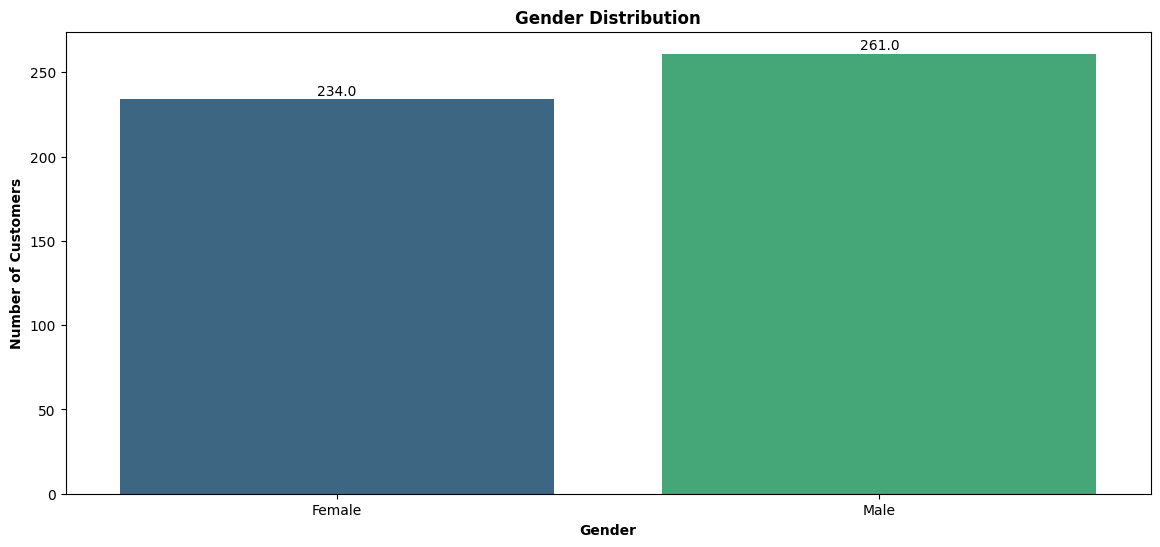

In [24]:
# univariate analysis of the Gender column
plt.figure(figsize=(14, 6))
show_values(sns.countplot(x=data["Gender"], palette="viridis"))
plt.title('Gender Distribution', weight = "bold")
plt.xlabel('Gender',  weight = "bold")
plt.ylabel('Number of Customers',  weight = "bold")
plt.show()

## *Churn Distribution*

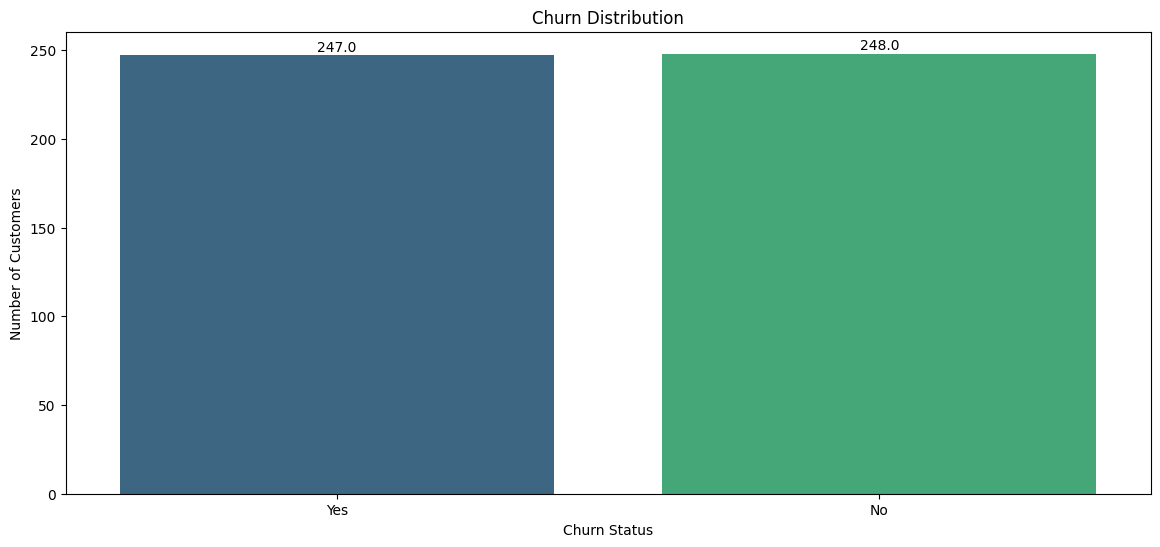

In [ ]:
# univariate analysis of the Churn column
plt.figure(figsize=(14, 6))
show_values(sns.countplot(x=data['Churn'], order=['Yes', 'No'], palette="viridis"))
plt.title('Churn Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()

In [317]:
# To validate the churn distribution
data["Churn"].value_counts()

Churn
No     248
Yes    247
Name: count, dtype: int64

### *What is the top selling Category?*

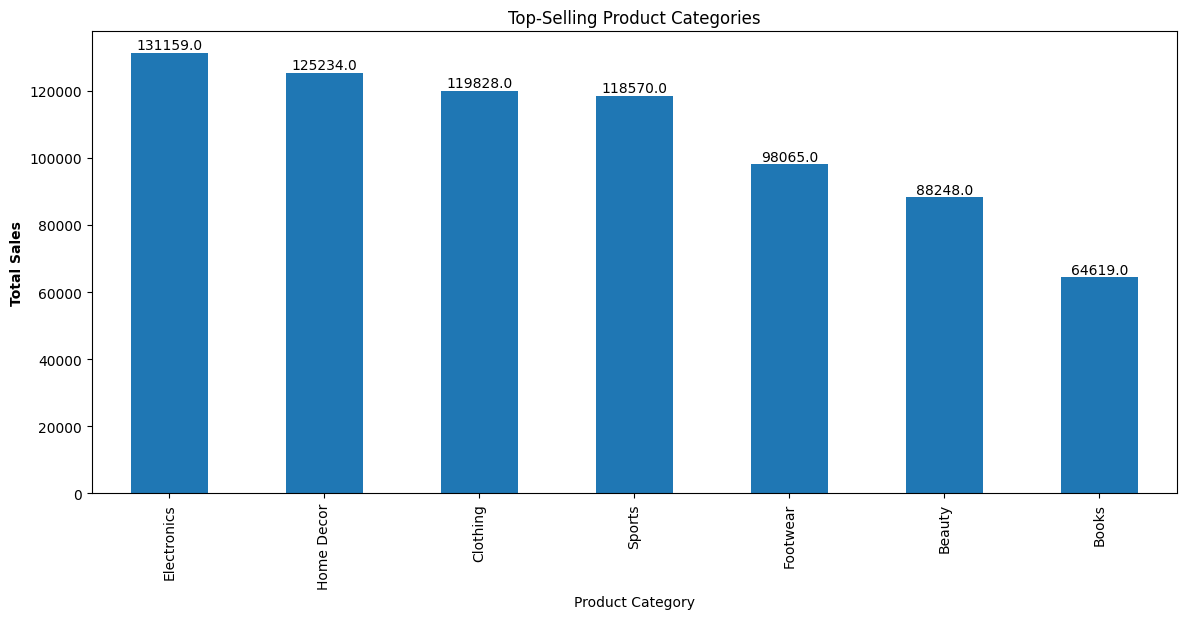

In [318]:
# Top-selling products
plt.figure(figsize=(14, 6))
top_products = data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
show_values(top_products.plot(kind='bar', title='Top-Selling Product Categories'))
plt.ylabel('Total Sales', weight = "bold")
plt.show()

## *Total Sales Over Time*

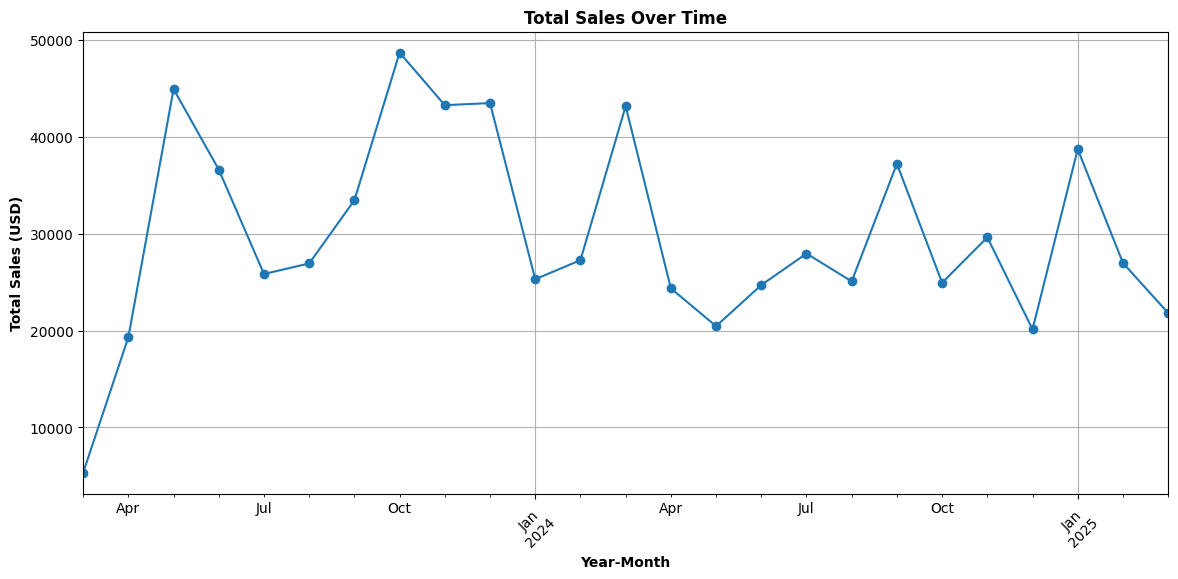

In [319]:
# Extract Year-Month as a proper datetime object
data['Year-Month'] = data['Date'].dt.to_period('M')

# Group by Year-Month and sum the total sales
monthly_sales = data.groupby('Year-Month')['Total Amount'].sum()

# Sort by Year-Month (now it's correctly recognized as a datetime object)
monthly_sales.sort_index(inplace=True)

# Plot sales trends over time
plt.figure(figsize=(14, 6))
monthly_sales.plot(marker='o', linestyle='-')
plt.title('Total Sales Over Time', weight = 'bold')
plt.xlabel('Year-Month', weight = 'bold')
plt.ylabel('Total Sales (USD)', weight = 'bold')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(True)
plt.show()

## *Total Sales By Month?*


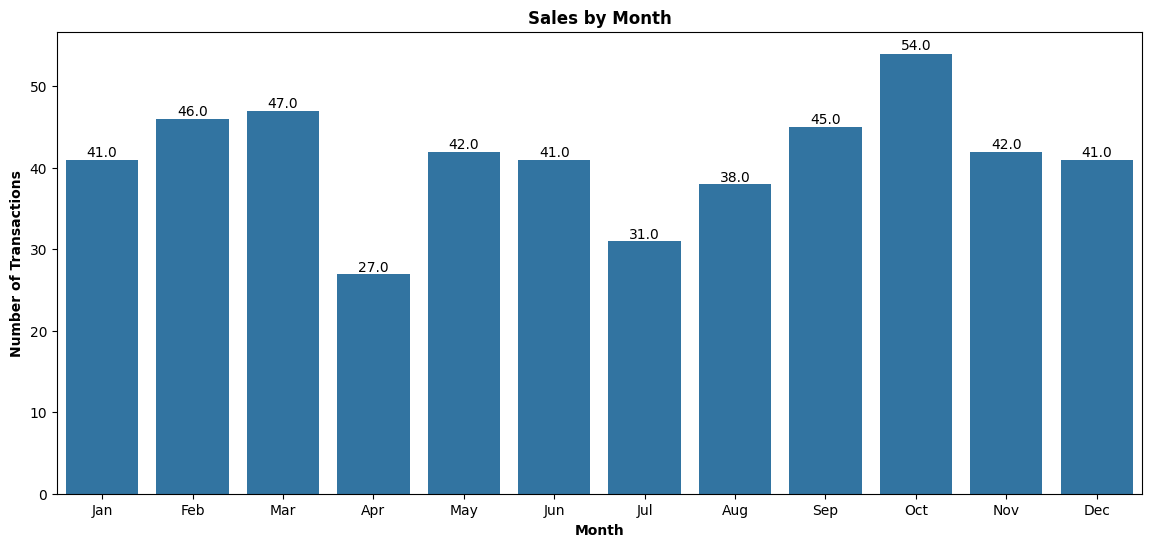

In [320]:
plt.figure(figsize=(14, 6))
show_values(sns.countplot(x='Month', data=data, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']))
plt.title('Sales by Month', weight = 'bold')
plt.xlabel('Month', weight = 'bold')
plt.ylabel('Number of Transactions', weight = 'bold')
plt.show()

## *Spending Distribution By Age Group*?


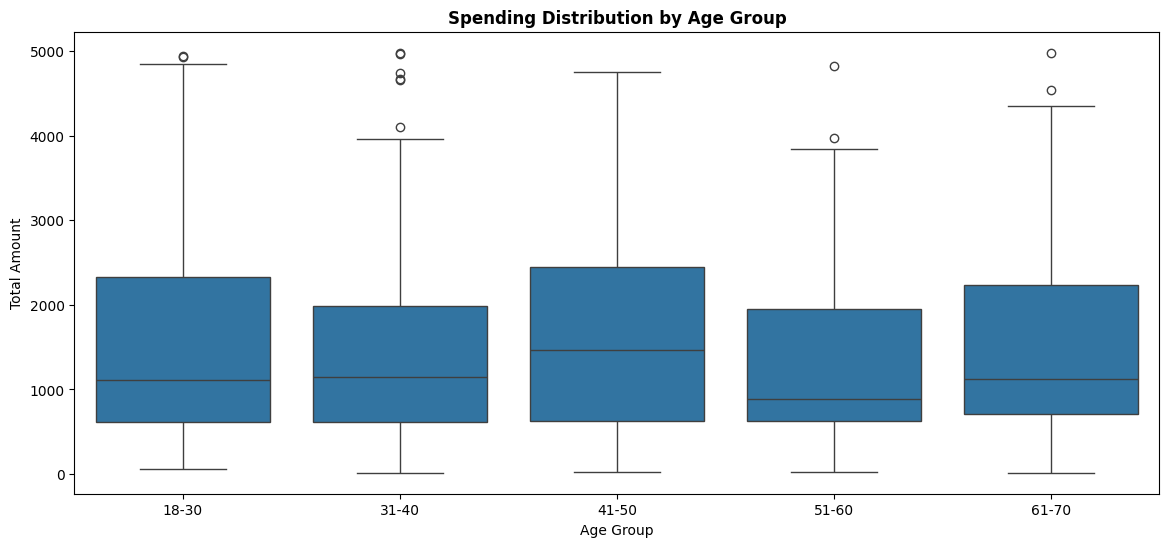

In [321]:
# Customer segmentation by age
data['Age Group'] = pd.cut(data['Age'], bins=[18, 30, 40, 50, 60, 70], labels=['18-30', '31-40', '41-50', '51-60', '61-70'], include_lowest=True)

plt.figure(figsize=(14, 6))
sns.boxplot(x='Age Group', y='Total Amount', data=data)
plt.title('Spending Distribution by Age Group', weight='bold')
plt.show()


## *Churn vs Frequency of Purchase*

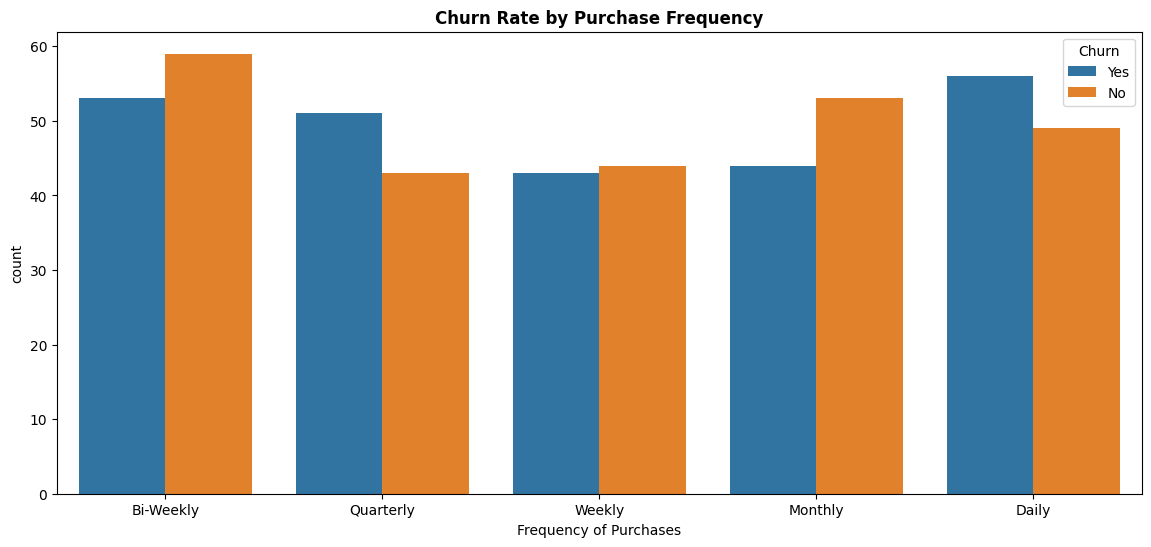

In [322]:
# Churn Analysis - Churn vs Frequency of Purchase
plt.figure(figsize=(14, 6))
sns.countplot(x='Frequency of Purchases', hue='Churn', data=data)
plt.title('Churn Rate by Purchase Frequency', weight = 'bold')
plt.show()


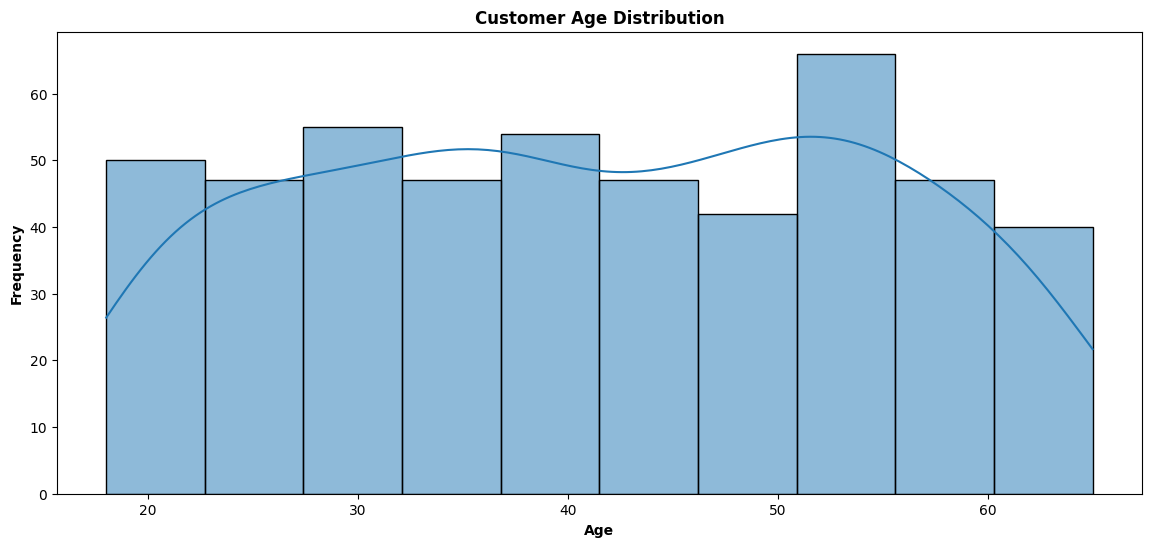

In [323]:
# Customer segmentation by Age
plt.figure(figsize=(14, 6))
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Customer Age Distribution',weight = 'bold')
plt.xlabel('Age', weight = 'bold')
plt.ylabel('Frequency', weight = 'bold')
plt.show()


## *Payment Method Distribution*

Text(0.5, 1.0, 'Payment Method Distribution')

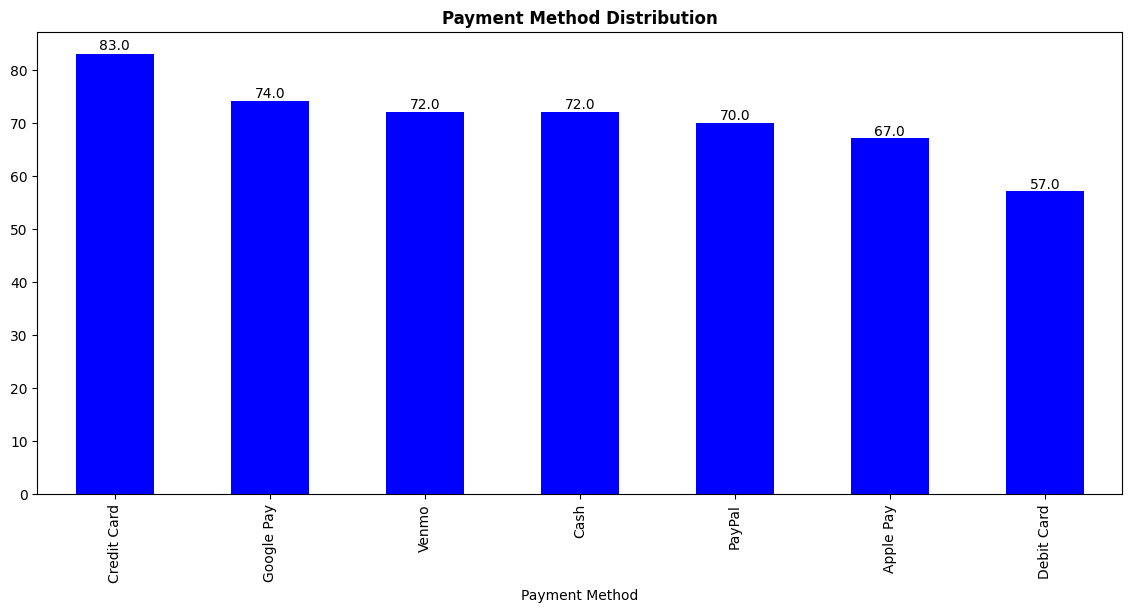

In [324]:
plt.figure(figsize=(14, 6))
show_values(data["Payment Method"].value_counts().plot(kind='bar', color='blue'))
plt.title('Payment Method Distribution', weight = "bold")

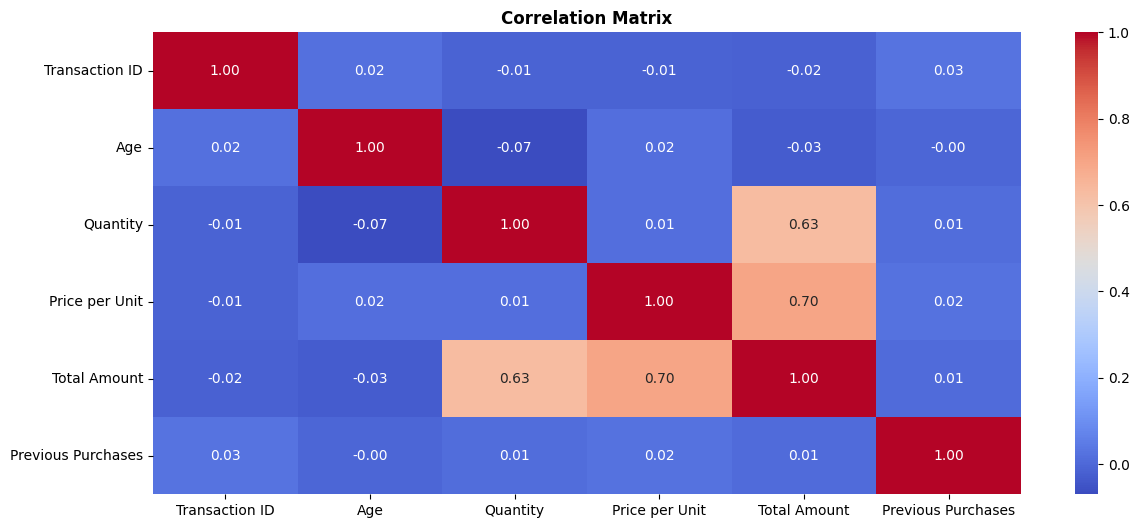

In [325]:
# Correlation heatmap

plt.figure(figsize=(14, 6))
dd = data.select_dtypes(include=np.number)

correlations = dd.corr()
# Using Heatmap
sns.heatmap(dd.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations')
plt.title("Correlation Matrix", weight="bold")
plt.show()


# Business Insights Summary

## 1. Top-Selling Product Categories

**Insights:**  
- **Electronics** leads in revenue, followed closely by **Home Decor** and **Clothing**.  
- **Books** remains the lowest-performing category in terms of total sales.

**Summary:**  
The data indicates that customers are most responsive to Electronics and Home Decor products, suggesting strong market demand. Although Clothing and Sports are performing well, there is room to improve revenue from lower-performing categories like Books.

**Recommendations:**  
- **Focus Marketing Efforts:** Allocate more marketing resources towards Electronics and Home Decor.
- **Upsell & Cross-Sell:** Bundle lower-performing categories with high-demand products to boost overall sales.

---

## 2. Total Sales Over Time

**Insights:**  
- Monthly total sales show significant fluctuations, with noticeable spikes mid-year and at year-end.  
- Some months register dips in sales, suggesting slower periods that may be tied to seasonality or external factors.

**Summary:**  
The sales trend reveals clear seasonal or cyclical patterns, with peak periods that could be leveraged through targeted campaigns, and slower periods that might benefit from promotional activities.

**Recommendations:**  
- **Seasonal Promotions:** Design marketing campaigns to boost sales during identified slow months.
- **Inventory Management:** Adjust inventory levels ahead of peak periods to meet higher demand and avoid stockouts.

---

## 3. Sales by Month

**Insights:**  
- October emerges as the month with the highest number of transactions, followed by March and February.
- April experiences the fewest transactions, highlighting a potential period of lower consumer activity.

**Summary:**  
Monthly transaction counts reveal that October is a prime period for customer activity—possibly due to pre-holiday shopping—while April is a comparatively slow month.

**Recommendations:**  
- **Leverage October's Momentum:** Consider launching new products or major promotions in October.
- **Revitalize April Sales:** Introduce spring promotions or discounts during April to stimulate customer interest.

---

## 4. Churn Rate by Purchase Frequency

**Insights:**  
- Customers purchasing on a **daily** basis are less likely to churn.
- Shoppers with **bi-weekly** or **monthly** purchase frequencies show a higher churn rate.

**Summary:**  
Frequent purchases correlate with higher customer retention. Conversely, longer gaps between transactions signal a risk of churn, emphasizing the importance of regular engagement.

**Recommendations:**  
- **Implement Loyalty Programs:** Encourage more frequent purchases through rewards or loyalty benefits.
- **Targeted Re-Engagement:** Launch personalized campaigns for customers with lower purchase frequencies to reduce churn risk.

---

## 5. Spending Distribution by Age Group

**Insights:**  
- Older age groups (51–60 and 61–70) show higher median spending, indicating a higher average customer value.
- Younger groups (18–30, 31–40) display a broader spending range with generally lower medians, though they do include high spenders.

**Summary:**  
Spending patterns vary across age groups. Older customers tend to spend more consistently, while younger customers are more variable, suggesting different purchasing behaviors and potential for tailored marketing.

**Recommendations:**  
- **Segmented Marketing:** Tailor campaigns to the specific spending habits of each age group—premium offers for older demographics and value-driven promotions for younger ones.
- **Product Positioning:** Consider developing exclusive or premium product lines for high-spending segments while also offering budget-friendly options for younger customers.

---

## 6. Correlation Matrix

**Insights:**  

**Strong Correlations:**
   - **Total Amount & Price per Unit (0.70):** The total amount spent is strongly correlated with the price per unit, meaning that higher-priced items significantly influence total spending.
   - **Total Amount & Quantity (0.63):** The number of items purchased also contributes significantly to the total amount spent.

**Weak or No Correlation:**
   - **Age & Total Amount (-0.03):** Age does not have a significant impact on the total amount spent.
   - **Previous Purchases & Total Amount (0.01):** There is no strong relationship between previous purchases and total spending.
   - **Age & Quantity (-0.07):** Younger or older individuals do not necessarily buy more or fewer items.

---

### Recommendations:
- **Focus on High-Value Products:** Since price per unit has a strong impact on total spending, promoting premium products could drive revenue.
- **Encourage Bulk Purchases:** Offering volume discounts can further increase total spending.
- **Personalized Marketing:** Since age does not significantly impact spending, segmentation should be based on purchase behavior rather than demographics.
- **Loyalty Programs Need Optimization:** Previous purchases do not strongly impact future spending, suggesting that loyalty programs may need improvement to drive repeat purchases.

Would you like a more detailed breakdown of any specific aspect? 😊

## Overall Strategic Takeaways

- **Capitalize on Best Sellers:**  
  Prioritize inventory and marketing efforts for high-performing categories (Electronics, Home Decor) to drive revenue.

- **Seasonal & Monthly Strategies:**  
  Use historical trends to plan promotions and manage inventory during both peak and slow sales periods.

- **Enhance Customer Engagement:**  
  Implement loyalty programs and targeted re-engagement strategies to reduce churn, particularly among less frequent buyers.

- **Segmented Marketing:**  
  Develop differentiated strategies based on customer demographics, especially age, to optimize product offerings and pricing.

By integrating these insights, the company can refine its marketing strategy, optimize inventory, and ultimately drive higher revenue and customer satisfaction.


## **Predictive Modeling**

In [326]:
# Encoding  variables
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Churn'] = le.fit_transform(data['Churn'])  # Yes=1, No=0
data["Promo Code Used"] = le.fit_transform(data["Promo Code Used"])
data["Discount Applied"] = le.fit_transform(data["Discount Applied"])
data["Subscription Status"] = le.fit_transform(data["Subscription Status"])

In [327]:
data

,Transaction ID,Date,Customer ID,Gender,Age,Location,Product Category,Quantity,Price per Unit,Total Amount,...,Shipping Type,Subscription Status,Promo Code Used,Discount Applied,Previous Purchases,Frequency of Purchases,Churn,Month,Year-Month,Age Group
0,1,2023-11-05,CUST856,0,39,Michigan,Sports,1,98,98,...,Free Shipping,1,1,0,32,Bi-Weekly,1,Nov,2023-11,31-40
1,2,2024-08-19,CUST824,1,36,Florida,Books,3,222,666,...,Express,1,1,1,34,Quarterly,0,Aug,2024-08,31-40
2,3,2023-10-02,CUST105,0,36,California,Clothing,3,114,342,...,Next Day Air,1,1,0,32,Weekly,1,Oct,2023-10,31-40
3,4,2023-08-13,CUST428,1,33,Florida,Electronics,1,16,16,...,Standard,0,1,1,2,Quarterly,0,Aug,2023-08,31-40
4,5,2024-09-11,CUST160,0,20,Florida,Footwear,5,839,4195,...,Next Day Air,1,1,1,43,Monthly,1,Sep,2024-09,18-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,497,2024-12-28,CUST377,1,60,California,Footwear,5,18,90,...,Next Day Air,0,0,0,25,Weekly,0,Dec,2024-12,51-60
498,498,2023-10-26,CUST289,0,34,Michigan,Footwear,2,350,700,...,Free Shipping,1,0,0,9,Daily,1,Oct,2023-10,31-40
499,499,2024-05-24,CUST306,0,65,Ohio,Electronics,2,950,1900,...,Standard,0,1,0,23,Weekly,0,May,2024-05,61-70
500,500,2024-12-06,CUST445,0,25,New York,Clothing,2,554,1108,...,Express,1,0,0,11,Monthly,1,Dec,2024-12,18-30


In [ ]:
def data_quality_analysis(data):
    print("Dataset Overview:")
    print("-" * 30)
    
    # Basic Information
    print(f"Total Rows: {len(data)}")
    print(f"Total Columns: {len(data.columns)}")
    
    # Missing Values
    print("\nMissing Values:")
    print(data.isnull().sum())
    
    # Unique Value Analysis
    print("\nUnique Value Counts:")
    for column in data.columns:
        unique_count = data[column].nunique()
        print(f"{column}: {unique_count} unique values")
    
    # Outlier Detection (Using IQR method for numeric columns)
    print("\nOutlier Analysis:")
    numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        print(f"{col}: {len(outliers)} outliers detected")
    
    # Distribution of Target Variable
    print("\nTarget Variable Distribution:")
    print(data['Churn'].value_counts(normalize=True))


data_quality_analysis(data)

Dataset Overview:
------------------------------
Total Rows: 495
Total Columns: 21

Missing Values:
Transaction ID            0
Date                      0
Customer ID               0
Gender                    0
Age                       0
Location                  0
Product Category          0
Quantity                  0
Price per Unit            0
Total Amount              0
Payment Method            0
Shipping Type             0
Subscription Status       0
Promo Code Used           0
Discount Applied          0
Previous Purchases        0
Frequency of Purchases    0
Churn                     0
Month                     0
Year-Month                0
Age Group                 0
dtype: int64

Unique Value Counts:
Transaction ID: 495 unique values
Date: 358 unique values
Customer ID: 390 unique values
Gender: 2 unique values
Age: 48 unique values
Location: 9 unique values
Product Category: 7 unique values
Quantity: 5 unique values
Price per Unit: 378 unique values
Total Amount: 448 uniq

In [ ]:
# Define features (X) and target (y)
target = ['Churn']
drop_columns = ['Transaction ID', 'Customer ID', 'Date', 'Months', 'Location', 'Product Category', 'Payment Method', 'Frequency of Purchases', 'Shipping Type', 'Month', 'Year-Month'
                , 'Age Group']  

# Drop the target and unnecessary columns from the feature set
X = data.drop(columns=target + drop_columns, errors='ignore')

# Extract the target variable
y = data[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Retrieve feature importances from the Random Forest model
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display the importance of each feature
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

print("Feature Importance Ranking:")
print(importance_df)


Feature Importance Ranking:
                   Feature  Importance
3           Price per Unit    0.214221
4             Total Amount    0.206067
1                      Age    0.192969
5       Previous Purchases    0.187033
2                 Quantity    0.067356
8  Subscription Status_Yes    0.037669
6      Promo Code Used_Yes    0.035217
0                   Gender    0.033593
7     Discount Applied_Yes    0.025876


In [ ]:
# A function to perform model comparison

def comparative_model_analysis(X, y):
    # Prepare the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   
    models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'XGBoost': XGBClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42)
    }
    
    results = {}
    
    # Evaluate each model
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        results[name] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, average='weighted'),
            'recall': recall_score(y_test, y_pred, average='weighted'),
            'f1_score': f1_score(y_test, y_pred, average='weighted')
        }
    
    print("Model Comparison Results:")
    for name, metrics in results.items():
        print(f"\n{name} Model:")
        for metric, value in metrics.items():
            print(f"  {metric.capitalize()}: {value:.4f}")
    
    # Visualization
    plt.figure(figsize=(10, 6))
    
    # Accuracy bar chart
    accuracies = [results[model]['accuracy'] for model in models.keys()]
    plt.bar(models.keys(), accuracies)
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  
    
    # Add value labels on top of each bar
    for i, v in enumerate(accuracies):
        plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    return results

Model Comparison Results:

Random Forest Model:
  Accuracy: 0.4949
  Precision: 0.5060
  Recall: 0.4949
  F1_score: 0.4931

Gradient Boosting Model:
  Accuracy: 0.5152
  Precision: 0.5188
  Recall: 0.5152
  F1_score: 0.5161

XGBoost Model:
  Accuracy: 0.4949
  Precision: 0.4949
  Recall: 0.4949
  F1_score: 0.4949

Logistic Regression Model:
  Accuracy: 0.5253
  Precision: 0.5363
  Recall: 0.5253
  F1_score: 0.5242


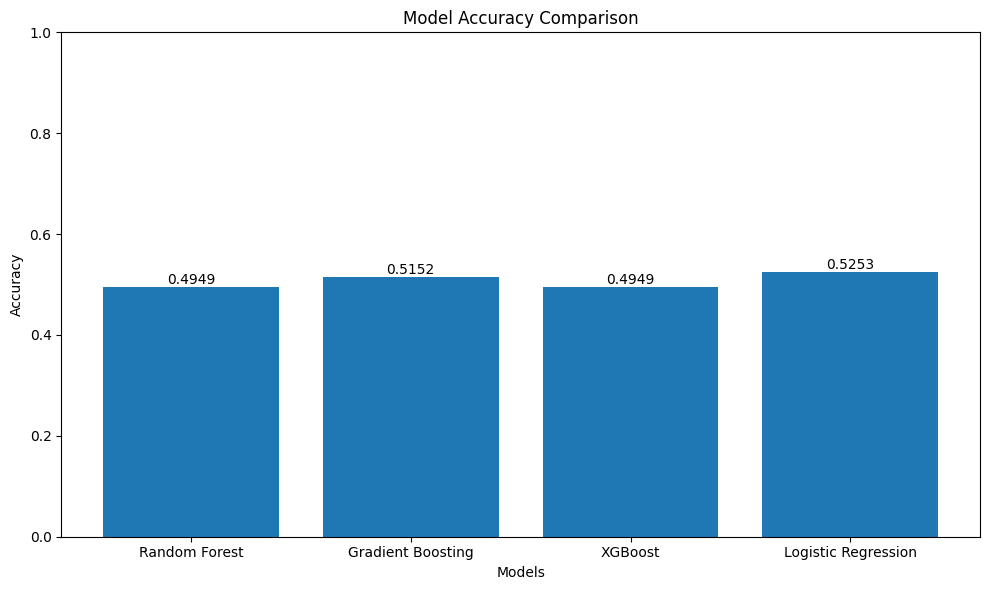

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run comparative analysis
model_results = comparative_model_analysis(X_scaled, y)

Sales Forecast:
         Date  Forecasted Sales
25 2025-04-30      12912.322048
26 2025-05-31      11817.223053
27 2025-06-30      16072.790628


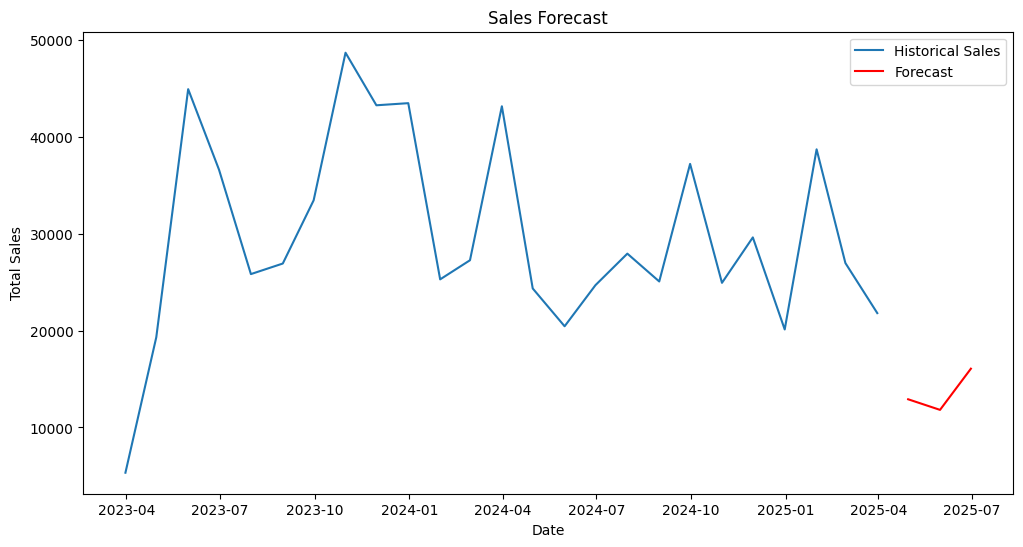

In [ ]:

# Group by month-end and aggregate total sales
monthly_sales = data.groupby(pd.Grouper(key='Date', freq='M'))['Total Amount'].sum().reset_index()

# Sort the data chronologically
monthly_sales = monthly_sales.sort_values('Date')

# Check for seasonal patterns and trend
if len(monthly_sales) < 24:
    print("Warning: Limited data for robust forecasting. Recommend collecting more historical data.")

# Use more robust forecasting method

try:
    # Determine the appropriate seasonal period
    seasonal_period = 12  # Typically 12 for annual seasonality
    
    # Fit the model
    sales_model = ExponentialSmoothing(
        monthly_sales['Total Amount'], 
        trend='add',  # Additive trend
        seasonal='add',  # Additive seasonality
        seasonal_periods=seasonal_period
    ).fit()
    
    # Forecast next 3 months
    forecast_periods = 3
    sales_forecast = sales_model.forecast(forecast_periods)
    
    # Create a DataFrame with forecast dates and values
    last_date = monthly_sales['Date'].max()
    forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_periods, freq='M')
    
    forecast_df = pd.DataFrame({
        'Date': forecast_dates,
        'Forecasted Sales': sales_forecast
    })
    
    print("Sales Forecast:")
    print(forecast_df)
    
    # Optional: Visualize the forecast
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12,6))
    plt.plot(monthly_sales['Date'], monthly_sales['Total Amount'], label='Historical Sales')
    plt.plot(forecast_dates, sales_forecast, color='red', label='Forecast')
    plt.title('Sales Forecast')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.show()

except Exception as e:
    print(f"An error occurred during sales forecasting: {e}")
    print("Please check your data preparation and ensure:")
    print("1. 'Date' column is in datetime format")
    print("2. 'Total Amount' contains numeric values")
    print("3. There are enough historical data points")

# Comprehensive Churn Prediction Model Analysis

## Executive Summary

This report provides a detailed analysis of the churn prediction models developed using four different algorithms: Random Forest, Gradient Boosting, XGBoost, and Logistic Regression. Despite a balanced dataset, the models demonstrate only modest predictive performance. The analysis identifies key challenges and outlines recommendations for future improvements to enhance predictive accuracy.

## 1. Model Performance Summary

### Performance Metrics Comparison

| Model                   | Accuracy | Precision | Recall  | F1 Score |
|-------------------------|----------|-----------|---------|----------|
| **Random Forest**       | 49.49%   | 50.60%    | 49.49%  | 49.31%   |
| **Gradient Boosting**   | 51.52%   | 51.88%    | 51.52%  | 51.61%   |
| **XGBoost**             | 49.49%   | 49.49%    | 49.49%  | 49.49%   |
| **Logistic Regression** | 52.53%   | 53.63%    | 52.53%  | 52.42%   |

### Observations:
- **Logistic Regression** has the highest accuracy (52.53%) among the tested models, followed by Gradient Boosting (51.52%). 
- Both Random Forest and XGBoost performed similarly, with accuracies around 49.5%.
- The overall performance of all models is only marginally better than random guessing, indicating a significant opportunity for improvement.

## 2. Diagnostic Analysis of Performance Limitations

### 2.1 Insufficient Data and Feature Quality
- **Limited Feature Discriminatory Power**: The current feature set may not capture the complexity of customer behavior leading to churn. Many important factors may be missing, such as detailed engagement metrics or additional behavioral indicators.
- **Feature Engineering Constraints**: While basic encoding and scaling have been applied, further advanced feature engineering (e.g., interaction terms, non-linear transformations, and composite features) is required.
- **Potential Multicollinearity**: Some features may be correlated, diluting their individual predictive power. A correlation analysis and dimensionality reduction (e.g., PCA) could be beneficial.

### 2.2 Model Complexity and Generalization Challenges
- **Algorithmic Limitations**: The modest performance across both ensemble methods (Random Forest, Gradient Boosting, XGBoost) and a simpler model (Logistic Regression) suggests that the underlying data patterns might be more complex than these models can capture with the current features.
- **Overfitting/Underfitting Risks**: There is an indication that the models might be underfitting the data due to the limited amount of predictive information available.

## 3. Rationale for Selected Machine Learning Algorithms

### **Logistic Regression**
- **Pros**: Simple, interpretable, and serves as a strong baseline for binary classification problems.
- **Cons**: Assumes a linear relationship between features and the target, which might not hold true in this complex scenario.
- **Usage**: Employed to establish a baseline and understand the contribution of individual features.

### **Random Forest**
- **Pros**: Robust against noise, can handle non-linear relationships, and provides insights via feature importance rankings.
- **Cons**: Less interpretable than Logistic Regression and may require careful tuning to prevent overfitting.
- **Usage**: Used to capture more complex interactions among features, although its performance was limited in this instance.

### **Gradient Boosting**
- **Pros**: Often outperforms other models by sequentially correcting errors from previous iterations, and handles non-linear relationships well.
- **Cons**: Can be computationally intensive and sensitive to hyperparameter settings.
- **Usage**: Tested as an alternative ensemble method, offering slightly improved performance over Random Forest.

### **XGBoost**
- **Pros**: Highly efficient and often yields state-of-the-art results in predictive modeling through regularization and robust handling of missing values.
- **Cons**: Requires significant hyperparameter tuning and is more complex to interpret.
- **Usage**: Implemented to evaluate its performance in comparison to other models, but did not show a performance advantage with the current data and feature set.

## 4. Future Improvements and Recommendations

### 4.1 Data and Feature Engineering Enhancements
- **Collect More Data**: Expand the dataset to include additional customer behavioral metrics, engagement data, and possibly external factors.
- **Advanced Feature Engineering**: Incorporate polynomial features, interaction terms, and domain-specific composite features. Utilize dimensionality reduction techniques to address multicollinearity.
- **Feature Selection**: Conduct thorough correlation analysis and feature importance ranking to refine the feature set.

### 4.2 Model Development Enhancements
- **Hyperparameter Tuning**: Use techniques such as Grid Search, Random Search, or Bayesian Optimization to fine-tune model parameters.
- **Algorithm Exploration**: Experiment with alternative models such as Support Vector Machines (SVM), Neural Networks, or ensemble meta-learners.
- **Cross-Validation**: Implement robust cross-validation strategies to ensure model generalizability and prevent overfitting.

### 4.3 Preprocessing Improvements
- **Scaling and Transformation**: Evaluate the use of different scaling methods (e.g., RobustScaler or MinMaxScaler) especially if data distributions are skewed.
- **Handling Outliers**: Apply advanced outlier detection and treatment techniques to mitigate their influence on the model.

## 5. Conclusion

The current churn prediction models demonstrate only marginal predictive power, with Logistic Regression slightly outperforming other more complex methods. The analysis indicates that the primary limitations lie in insufficient feature representation and the need for more advanced preprocessing and hyperparameter tuning. By systematically enhancing data quality, expanding the feature set, and refining model parameters, it is expected that significant improvements in predictive performance can be achieved.